<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Conceptual Neural Networks Lab

---


In class, you've seen how to build a neural network in Keras. This lab is intended to help you understand exactly how a neural network is built and understand the math behind it. We will walk through the process of building a *very* simple neural network by hand.

Let's start at the beginning. In general, a forward pass through a neural network works like this:
1. Take our inputs and multiply each input by a weight.
2. Add all of the results from step 1 together.
3. Add a bias to the result from step 2.
4. Pass the value from step 3 through an activation function.
5. This is now passed to the next layer.

![](./images/perceptron.jpeg)

([*image source*](https://www.kdnuggets.com/2016/10/beginners-guide-neural-networks-python-scikit-learn.html))

Let's code a simple one-layer neural network together!

**The ONLY Python libraries you will need/can use in this lab are numpy and matplotlib!**

In [1]:
# import numpy and matplotlib - this is all you will need for this lab!
import numpy as np 
import matplotlib as plt 

# Set a random seed
np.random.seed(123)

**Problem 1:** Let's write a function called `update` that takes an array of our inputs, multiplies these by their weights, and sums them together with a bias. We will start with random initialization of our weights and bias. For simplicity, the network we will build will just have 2 inputs.

For example,
```python
inputs = np.array([12, 4])
weights = np.array([1, 2])
bias = 1

update(inputs, weights, bias)
```
Should return:
```python
21
```

Since: $ (12*1) + (4*2) + 1 = 21 $


In [ ]:
# Inputs and initial weights/bias:

inputs = np.array([12, 4])
weights = np.array([1, 2])
bias = 1

In [3]:
# Answer:
def update(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

# Test the function
inputs = np.array([12, 4])
weights = np.array([1, 2])
bias = 1

result = update(inputs, weights, bias)
print(result) 



21


In [4]:
update(inputs, weights, bias)

21

**Problem 2:** Now, let's code our activation function. For best performance, we often use ReLU as our activation function in hidden layers. Graphically, this looks like:

![](./images/relu.png)

([*image source*](https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7))

And can be written as:

$$
f(x) = \left\{\begin{matrix}
0 \text{  for  } x<0\\
x \text{  for  } x\geq 0
\end{matrix}\right.
$$

Write a function called `relu` that takes in a value and returns the value after it has been passed through the ReLU function.

For example,
```python
relu(-3)
```
Should return:
```python
0
```
Since $-3 < 0$, and
```python
relu(3)
```
Should return:
```python
3
```
Since $3 \geq 0$.

In [5]:
# Answer:
def relu(x):
    return max(0, x)


print(relu(-3)) 
print(relu(3)) 


0
3


In [6]:
relu(-3)

0

In [7]:
relu(3)

3

**Problem 3:** Now, let's code our activation function for our output layer! Let's assume we are building a neural network for a regression problem. What activation function should we use?

> Answer: linear activation or no activation is required for regression problem.

**Problem 4:** Write a function called `output_activation` that takes in a value and passes it through the activation function you decided on in problem 3.

In [9]:
# Answer: 
def linear_activation(x):
    return x
def output_activation(x):
    return linear_activation(x)


**Problem 5**: Put it together! We will use the functions we wrote above to build a simple neural network to predict the price of a home given home size and quality on a scale of 1-5. For simplicity, we will build a network with one hidden layer with only one node.

Our general network architecture will look like this:

![](./images/network_drawing.png)

The simple data we will work with is given here:

| square_feet | quality | price |
| --- | --- | --- |
| 1750 | 3 | \$250,000 |
| 2500 | 4 | \$600,000 |
| 4320 | 5 | \$895,000 |
| 1300 | 1 | \$195,000 |

We will normalize our data to ensure all values are between 0 and 1. This will help our neural network converge and ensure that we do not lose any weights during the fitting process (since any negative values will be set to 0 when they are passed through the ReLU function):

In [10]:
# Put data from above into a numpy array for modeling

housing_data = np.array([[1750, 3, 250_000],
                        [2500, 4, 600_000],
                        [4320, 5, 895_000],
                        [1300, 1, 195_000]])

In [11]:
# Split housing data into X & y
X = housing_data[:,[0,1]]
y = housing_data[:,2]

# Normalize each column by scaling all values into the range [0, 1]
#   - Avoids negative values for ReLU, which would prevent weight updates
#   - ptp: peak-to-peak, i.e. the range of each column (max - min)
X_scaled = (X - X.min(axis=0)) / X.ptp(axis=0)

# Normalize y identically
#    - Ensures the weights do not have to be enormously adjusted with a huge learning rate
y_scaled = (y - y.min()) / y.ptp()

For simplicity, we will only use **one observation** of our data to start!

| square_feet | quality | price |
| --- | --- | --- |
| 1750 | 3 | \$250,000 |

In [12]:
# Save the first row of the dataset for simplicity

X_scaled_simple = X_scaled[0,:]
y_simple = y_scaled[0]

Now we will run this through our network!

To do this, pass the `X_scaled_simple` data, `w1` and `w1` from the given weights vector, and `b1` from the given bias vector into your `update` function. Save the returned array as `sum1`.

We will use randomly generated weights and bias to start.

In [15]:
# Initialize random weights and biases
# We need 3 weights and 2 biases
# If you are unsure why this is, go back to
# the picture of the network architecture above!

# Weights & bias vectors (positive to avoid reLU zeroing out)
weights = np.abs(np.random.normal(size=3)) # [w1, w2, w3]
biases = np.abs(np.random.normal(size=2))   # [b1, b2]

In [19]:
biases

array([1.26593626, 0.8667404 ])

In [17]:
X_scaled_simple

array([0.14900662, 0.5       ])

In [21]:
weights[:2]

array([1.65143654, 2.42667924])

In [20]:
# Get sum1:
sum1 = update(X_scaled_simple, weights[:2], biases[0])

# Answer:



**Problem 6:** Apply your hidden layer activation function `relu` to your `sum1`. Save the result of this as `out1`.

In [22]:
# Get out1:
# Answer:
out1 = relu(sum1)


**Problem 7**: We will now pass the output from the hidden layer to our output layer. To do this:
1. Pass the `out1` result, `w3` from the given weights vector, and `b2` from the given bias vector through your `update` function. Save the result as `sum2`.
2. Apply your output layer activation function `output_activation` to your `sum2`. Save the result of this as `out2`. This is our prediction of the price of that first home!

*Hint: Your `update` function takes in an array instead of just a single number! You may have to convert `out1` to an array before running it through your `update` function!*

In [24]:
# Get sum2 and out2:
# Answer:
out1_array = np.array([out1])
sum2 = update(out1_array, weights[2], biases[1])
out2 = output_activation(sum2)


**Problem 8**: Put it together! Write a function called `forward` that goes through a complete forward pass (combines all of your steps from problems 5-7). This function should take in a row of the data, weights, and biases and:
1. Calculates `sum1`: the result of passing the row of data, the weights, and the bias through your `update` function.
2. Calculates `out1`: the result of applying your hidden layer activation function `relu` to your `sum1` result from step 1.
3. Calculates `sum2`: the result of passing `out1`, the weights, and the bias through your `update` function.
4. Calculates `out2`: the result of applying your output layer activation function `output_activation` to your `sum2` result from step 3.
5. Returns `sum1`, `out1`, `sum2`, and `out2`!

You have now written a function that completes one forward pass through our neural network! To check your work, you should get the same results from problems 5-7 here (assuming you are using the same randomly generated weights and biases vectors)!

In [25]:
# Answer:
def forward(data_row, weights, biases):
    sum1 = update(data_row, weights[:2], biases[0])
    out1 = relu(sum1)
    sum2 = update (out1, weights[2], biases[1])
    out2 = output_activation(sum2)
    return sum1, out1, sum2, out2


In [26]:
forward(X_scaled_simple, weights, biases)

(2.7253508610953547,
 2.7253508610953547,
 2.0356778046529564,
 2.0356778046529564)

**Problem 9:** Now, we need to quantify our loss. Since this is a regression problem, we will use the mean squared error (MSE) loss, which can be written as:

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{true}-y_{pred})^2 
$$

Write a function called `mse` that takes in two arrays, `y_true` and `y_pred` and returns the mean squared error.

In [27]:
# Loss function:
# Answer:
def mse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    squared_error = (y_true - y_pred) ** 2
    mean_squared_error = np.mean(squared_error)
    return mean_squared_error


Now, find the mean squared error between your `out2` (y_pred) and `y_simple` (y_true). Since your function took in arrays and we are just working with one example for now, we will convert these values to arrays of length 1.

In [28]:
# Convert y_simple and out2 to arrays to use in function:

y_simple = np.array([y_simple])
output = np.array([out2])

In [29]:
mse(y_simple, output)

3.830265367298971

How is your model doing? Probably very bad! This is where the magic happens: backpropagation. Backpropagation is the process of using gradient descent to update our weights and biases in order to try to minimize the loss function (mean squared error in this case). Check out the gradient descent lesson if you need a reminder on how this works.

We will be using the terms $w_1$, $h_1$, $w_3$, etc. for this next part. Here is a reminder of our network that labels all of the weights with these terms. As a simple example, we will work our way backwards through one portion of the network to update $w_1$ (through $o_1$ (predicted price), $w_3$, and $h_1$).

![](./images/network_drawing.png)

We can define our new weights (and biases) using gradient descent. Again, for simplicity we will just work through updating $w_1$:

$$
w_1 \leftarrow w_1 - \lambda \frac{\partial L}{\partial w_1}
$$

Since we work backwards through our network with multiple variables, we calculate the derivative of the loss with respect to $w_1$ ($ \frac{\partial L}{\partial w_1} $) using [partial derivatives](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/introduction-to-partial-derivatives):

$$
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial h_1} * \frac{\partial h_1}{\partial w_1}
$$

Where $L$ is the loss, $w_1$ is the first weight, $h_1$ is the output from the first hidden layer, and $y_{pred}$ is the predicted value of y.

For those of you familiar with calculus, feel free to try to compute these partial derivatives on your own! For those of you not as familiar, I will give you each of these for our scenario. Remember, we are using MSE as our loss function and ReLU as our hidden layer activation function:

$$
\frac{\partial L}{\partial y_{pred}} = -2(y_{true}-y_{pred})
$$

$$
\frac{\partial y_{pred}}{\partial h_1} = w_3*f'(w_3h_1+b_2)
$$

$$
\frac{\partial h_1}{\partial w_1} = x_1*f'(w_1x_1+w_2x_2+b_1)
$$

Where $f'$ is the derivative of the ReLU function:

$$
f'(x) = \left\{\begin{matrix}
0 \text{  for  } x<0\\
1 \text{  for  } x\geq 0
\end{matrix}\right.
$$

These last two work because of the [chain rule](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1a/a/chain-rule-review).

We now have all the pieces to update our weights and biases! We are technically using stochastic gradient descent to update our weights and biases here, since we only operate on one sample at a time. The general process for backpropagation will be:
1. Select one sample from our dataset.
2. Calculate the partial derivatives.
3. Use the equation from gradient descent to update each weight and bias ($w_1 \leftarrow w_1 - \lambda \frac{\partial L}{\partial w_1}$).
4. Repeat for each sample.

**Problem 10:** Write a function called `relu_deriv` that is the derivative of the ReLU function:

$$
f'(x) = \left\{\begin{matrix}
0 \text{  for  } x<0\\
1 \text{  for  } x\geq 0
\end{matrix}\right.
$$

This function should take in an input and return the derivative of the ReLU function at that input.

In [30]:
# Derivative of ReLU:
# Answer:
def relu_deriv(x):
    if x < 0:
        return 0
    else:
        return 1



### Putting it all together

We are now ready to create a neural network from scratch! 

Again, for simplicity all we will do right now is write code that updates $w_1$ to start. (In order to actually minimize our loss function, we will need to expand this to update $w_2$, $w_3$, $b_1$, and $b_2$ as well. We will do this later on.)

![](./images/network_drawing.png)

*Note*: this is definitely not going to find an optimal model since this is an extremely simplified example. Hopefully you have developed more of an appreciation for Keras!

**Problem 11:** Write a function called `update_weights` that takes in your X data, y data, weights, biases, and a learning rate ($\lambda$) in order to update the weights using gradient descent. This function should:
1. Go through one forward pass of your network to generate a prediction (use your `forward` function here) for each row in your dataset.
2. Goes through the process of backpropagation to find $\frac{\partial L}{\partial w_1}$: $\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial h_1} * \frac{\partial h_1}{\partial w_1}$ (this code is given for you).
3. Updates $w_1$ using gradient descent ($w_1 \leftarrow w_1 - \lambda \frac{\partial L}{\partial w_1}$).
4. Calculates the loss.
5. Returns the loss.

Comments and starter code is given to help you work through this problem!

In [31]:
def update_weights(X, y_true, weights, biases, learning_rate):
    """ Updates the weight values. Returns the resulting loss. """
    
    # Initialize prediction array with 0's
    y_preds = np.zeros_like(y_true)
    
    # Initialize loss
    loss = 0
    
    # Loop through each row in the dataset
    for i, (row, y_actual) in enumerate(zip(X, y_true)):
        # Forward pass
        sum1, out1, sum2, out2 = forward(row, weights, biases)
        
        # Save out2 as the corresponding position in y_pred
        y_preds[i] = out2

        # Backpropagation
        dl_dypred = 2 * (out2 - y_actual)
        dypred_dh1 = weights[2] * relu_deriv(sum2)
        dh1_dw1 = row[0] * relu_deriv(sum1)

        # Gradient descent to update w1
        weights[0] -= learning_rate * dl_dypred * dypred_dh1 * dh1_dw1
        
        # Calculate loss
        loss += (out2 - y_actual) ** 2
        
    # Return the loss
    return loss

    

In [32]:
update_weights(X_scaled, y_scaled, weights, biases, learning_rate = 0.02)

14.026259140850067

Congrats! You've updated $w_1$ using gradient descent and returned your loss! Now, lets put this all together to update $w_1$ in our network to actually train our model. Since this is challenging, this function is given for you. As long as you have successfully completed the problems up to this point, your neural network should work and we can actually train our model!

The first function is called `plot_predictions` and allows us to visualize how our model is doing by plotting the loss via gradient descent and the difference between the true square footage and our model's predictions.

The second function is called `train` and trains our model by taking in your X data, y data, a learning rate, and a certain number of epochs. For each epoch, the network:
1. Goes through a forward pass using your `forward` function.
2. Goes through a backward pass to calculate the loss using your `update_weights` function.
3. Uses the `plot_predictions` function to visualize how our model is doing!
4. Repeats steps 1-3 for the given number of epochs.

In [33]:
def plot_predictions(X, y_true, weights, biases):
    # Loss scatter plot titles
    plt.title('Loss via Gradient Descent')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    # Side-by-side prediction plots
    fig, ax = plt.subplots(1, 2, sharey=True)
    fig.suptitle('Actual (blue) vs. predicted (orange)')
    ax[0].set_ylabel('price (normalized)')
    ax[0].set_xlabel('square feet (normalized)')
    ax[1].set_xlabel('quality (normalized)')
    
    # Display each predicted value
    for i, (row, y_actual) in enumerate(zip(X, y_true)):
        *_, y_pred = forward(row, weights, biases)
        ax[0].scatter(row[0], y_pred, c='orange')
        ax[0].scatter(row[0], y_actual, c='b')
        ax[1].scatter(row[1], y_pred, c='orange')
        ax[1].scatter(row[1], y_actual, c='b')

In [34]:
# create code for training
def train(X, y_true, learning_rate, epochs):
    """ Initialize and train netork for given epochs."""
    
    # Initialize random weights and biases:
    weights = np.abs(np.random.normal(size=3))  # [w1, w2, w3]
    biases = np.abs(np.random.normal(size=2))   # [b1, b2]
    
    for epoch in range(epochs):
        # Forward pass + Backpropagation + Gradient Descent
        loss = update_weights(X, y_true, weights, biases, learning_rate)
      
        #print(f'Loss at epoch {epoch}: {loss}')
        plt.scatter(epoch, loss, c='b')
    
    print('Final loss:', loss)
    plot_predictions(X, y_true, weights, biases)

Now run the `train` function on the `X_scaled` and `y_scaled` data! Your loss should be decreasing each epoch, but this will be a sub-optimal model since we are only updating $w_1$ for now.

Final loss: 10.510013981216925


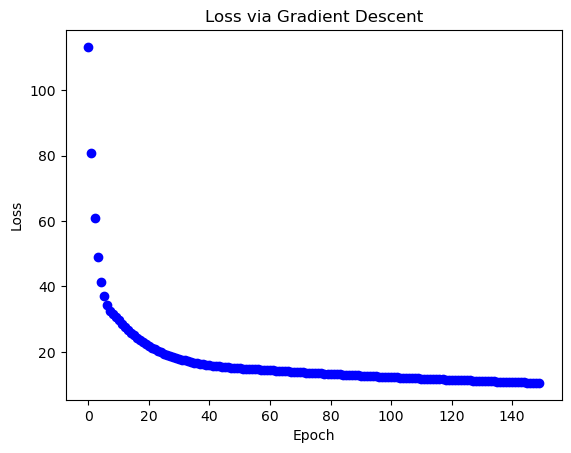

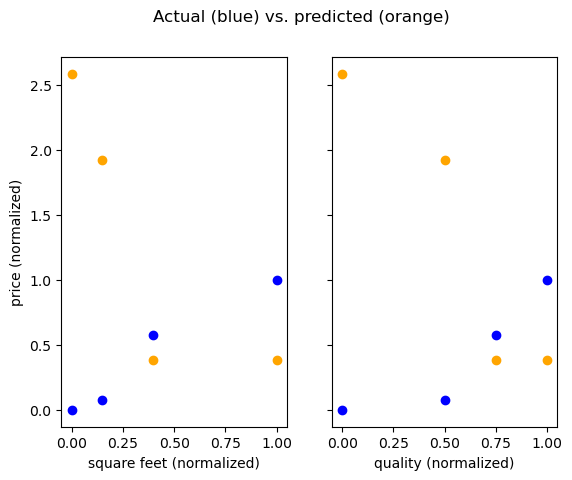

In [36]:
import matplotlib.pyplot as plt
train(X_scaled, y_scaled, 0.02, 150);

Still not satisfied with the performance of your model? Well that's because we were only updating one of the weights! What happens when we update **all** of our weights and biases using this process? The code below will do that for us!

In [37]:
# Update ALL weights and biases
def update_weights(X, y_true, weights, biases, learning_rate):
    """ Updates the weight values. Returns the resulting loss. """
    
    # Initialize prediction array with 0's
    y_preds = np.zeros_like(y_true)
    
    for i, (row,y_actual) in enumerate(zip(X, y_true)):
        # Forward pass
        sum1,out1, sum2,out2 = forward(row, weights, biases)
        y_preds[i] = out2

        # Backpropagation
        dl_dypred = 2 * (out2 - y_actual)
        dypred_dh1 = weights[2] * relu_deriv(sum2)

        dh1_dw1 = row[0] * relu_deriv(sum1)
        dh1_dw2 = row[1] * relu_deriv(sum1)
        dh1_db1 = relu_deriv(sum1)      
        
        dypred_dw3 = out1 * relu_deriv(sum2)
        dypred_db2 = relu_deriv(sum2)
        
        # Gradient descent - Update weights and biases
        weights[0] -= learning_rate * dl_dypred * dypred_dh1 * dh1_dw1
        weights[1] -= learning_rate * dl_dypred * dypred_dh1 * dh1_dw2
        weights[2] -= learning_rate * dl_dypred * dypred_dw3

        biases[0] -= learning_rate * dl_dypred * dypred_dh1 * dh1_db1
        biases[1] -= learning_rate * dl_dypred * dypred_db2
    
    # Calculate loss
    loss = mse(y_true, y_preds)
    return loss

Final loss: 0.027761565817887936


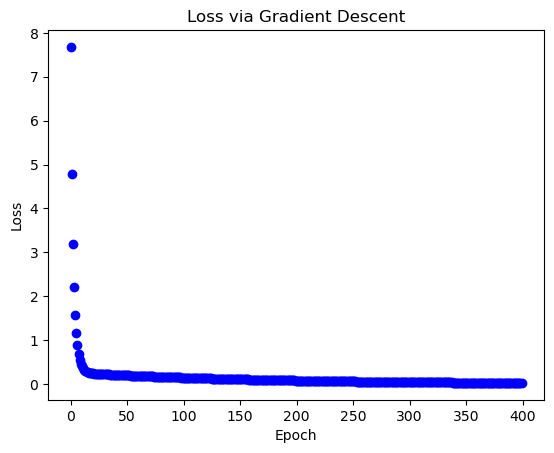

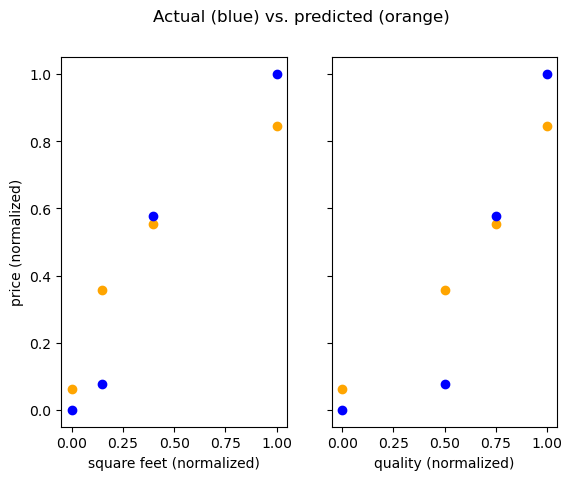

In [38]:
train(X_scaled, y_scaled, 0.004, 400);

That's it! You've created a *very* simple neural network using only numpy! Hopefully by now you have a better understanding of the math behind a neural network.

*Credit: inspiration for this lab comes from [this blog post](https://victorzhou.com/blog/intro-to-neural-networks/).*